In [ ]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt

In [ ]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
font.get_name()

'NanumGothic'

In [ ]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

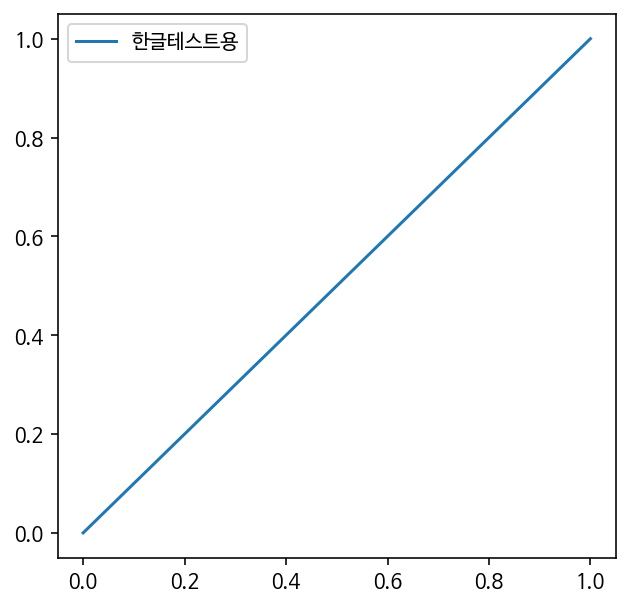

In [ ]:
#그래프 그림 (가로 5 세로5)
plt.figure(figsize=(5,5))
#X ,Y 좌표 설정
plt.plot([0,1], [0,1], label='한글테스트용')
#범례 표시
plt.legend()
#그래프 그림
plt.show()

In [ ]:
! pip install PyMySQL

In [ ]:
! python3 -m pip install PyMySQL[rsa]

In [ ]:
import pymysql.cursors

In [ ]:
import pandas as pd

In [ ]:
import plotly.subplots as ms

In [ ]:
import plotly.graph_objects as go

In [ ]:
! pip3 install crytography

  Using cached crytography-1.0.0.tar.gz (785 bytes)
  Using cached crytography-0.0.1.tar.gz (33 kB)
ERROR: Could not find a version that satisfies the requirement crytography (from versions: 0.0.1, 1.0.0)
ERROR: No matching distribution found for crytography


In [ ]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.51.153', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [ ]:
connection

In [ ]:
cursor = connection.cursor()

In [ ]:
cursor

In [ ]:
#### 종목 여기서 추가하세요 
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,M5_PRC , M10_PRC, M20_PRC
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      WHERE T1.STK_NM in ('제일바이오','한일홀딩스')
      AND T2.DT >= '2020-03-20'
      AND T2.DT <= '2020-05-06';
"""  

In [ ]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

60

In [ ]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [ ]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('5880.000'),
  'DT': datetime.date(2020, 3, 20),
  'H_PRC': Decimal('5880.000'),
  'L_PRC': Decimal('5540.000'),
  'M10_PRC': Decimal('6302.000'),
  'M20_PRC': Decimal('6647.000'),
  'M5_PRC': Decimal('5794.000'),
  'O_PRC': Decimal('5540.000'),
  'SEC_NM': '건축자재',
  'STK_CD': '003300',
  'STK_NM': '한일홀딩스',
  'VOL': Decimal('45525.000')},
 {'C_PRC': Decimal('5800.000'),
  'DT': datetime.date(2020, 3, 23),
  'H_PRC': Decimal('5960.000'),
  'L_PRC': Decimal('5600.000'),
  'M10_PRC': Decimal('6189.000'),
  'M20_PRC': Decimal('6593.500'),
  'M5_PRC': Decimal('5728.000'),
  'O_PRC': Decimal('5770.000'),
  'SEC_NM': '건축자재',
  'STK_CD': '003300',
  'STK_NM': '한일홀딩스',
  'VOL': Decimal('50780.000')},
 {'C_PRC': Decimal('6110.000'),
  'DT': datetime.date(2020, 3, 24),
  'H_PRC': Decimal('6200.000'),
  'L_PRC': Decimal('5760.000'),
  'M10_PRC': Decimal('6094.000'),
  'M20_PRC': Decimal('6553.500'),
  'M5_PRC': Decimal('5792.000'),
  'O_PRC': Decimal('5760.000'),
  'SEC_NM': '건축

In [ ]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [ ]:
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC
0,003300,한일홀딩스,건축자재,2020-03-20,5540.000,5540.000,5880.000,5880.000,45525.000,5794.000,6302.000,6647.000
1,003300,한일홀딩스,건축자재,2020-03-23,5770.000,5600.000,5960.000,5800.000,50780.000,5728.000,6189.000,6593.500
2,003300,한일홀딩스,건축자재,2020-03-24,5760.000,5760.000,6200.000,6110.000,31220.000,5792.000,6094.000,6553.500
3,003300,한일홀딩스,건축자재,2020-03-25,6220.000,6210.000,6740.000,6470.000,24240.000,5950.000,6044.000,6526.500
4,003300,한일홀딩스,건축자재,2020-03-26,6720.000,6470.000,6730.000,6610.000,23545.000,6174.000,6025.000,6511.000
5,003300,한일홀딩스,건축자재,2020-03-27,6620.000,6590.000,6780.000,6600.000,34780.000,6318.000,6056.000,6504.000
6,003300,한일홀딩스,건축자재,2020-03-30,6470.000,6400.000,6800.000,6800.000,51115.000,6518.000,6123.000,6496.000
7,003300,한일홀딩스,건축자재,2020-03-31,6810.000,6720.000,6940.000,6810.000,28165.000,6658.000,6225.000,6477.500
8,003300,한일홀딩스,건축자재,2020-04-01,6670.000,6670.000,6820.000,6810.000,30300.000,6726.000,6338.000,6460.000
9,003300,한일홀딩스,건축자재,2020-04-02,6650.000,6650.000,7300.000,6810.000,53415.000,6766.000,6470.000,6449.500


In [ ]:
# DT 컬럼을 날짜와 시간 타입으로 변환
df["DT"] = pd.to_datetime(df["DT"])

In [ ]:
# O_PRC 컬럼부터 마지막 컬럼까지 정수로 변환
df.loc[: , "O_PRC":] = df.loc[: , "O_PRC":].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STK_CD   60 non-null     object        
 1   STK_NM   60 non-null     object        
 2   SEC_NM   60 non-null     object        
 3   DT       60 non-null     datetime64[ns]
 4   O_PRC    60 non-null     int64         
 5   L_PRC    60 non-null     int64         
 6   H_PRC    60 non-null     int64         
 7   C_PRC    60 non-null     int64         
 8   VOL      60 non-null     int64         
 9   M5_PRC   60 non-null     int64         
 10  M10_PRC  60 non-null     int64         
 11  M20_PRC  60 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 5.8+ KB


In [ ]:
# 우디 피봇포인트
# 2차 저항선 : 피봇 +고가 - 저가 
# 1차 저항선 : 2 피봇 - 저가
# 피봇포인트 : (고가 + 저가 + 2종가)/4
# 1차 지지선 : 2피봇 - 고가 
# 2차 지지선 : 피봇 - 고가 +저가 

df["2차 저항선"] = 2*df["C_PRC"]+2*df["H_PRC"]
df.drop("2차 저항선",axis=1,inplace=True) 

In [ ]:
df[df["C_PRC"] == 27700]

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC


In [ ]:
# 여기를 바꿔주세요
# 매수가 
CPRC = 27700
# 고가
HPRC = 27800
# 저가
LPRC = 26400


In [ ]:
#df["피봇포인트"] = (df["H_PRC"]+df["L_PRC"]+2*df["C_PRC"])/4
#df["1차 지지선"] = 2*df["피봇포인트"] - df["H_PRC"] 
#df["2차 지지선"] = df["피봇포인트"] - df["H_PRC"] + df["L_PRC"]
#df["1차 저항선"] = 2 * df["피봇포인트"] - df["L_PRC"] 
#df["2차 저항선"] = df["피봇포인트"] +df["H_PRC"] - df["L_PRC"] 

In [ ]:
df["피봇포인트"] = (HPRC+LPRC+2*CPRC)/4
df["1차 지지선"] = 2*df["피봇포인트"] - HPRC
df["2차 지지선"] = df["피봇포인트"] - HPRC + LPRC
df["1차 저항선"] = 2 * df["피봇포인트"] - LPRC 
df["2차 저항선"] = df["피봇포인트"] + HPRC - LPRC

In [ ]:
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC,피봇포인트,1차 지지선,2차 지지선,1차 저항선,2차 저항선
0,003300,한일홀딩스,건축자재,2020-03-20,5540,5540,5880,5880,45525,5794,6302,6647,27400.0,27000.0,26000.0,28400.0,28800.0
1,003300,한일홀딩스,건축자재,2020-03-23,5770,5600,5960,5800,50780,5728,6189,6593,27400.0,27000.0,26000.0,28400.0,28800.0
2,003300,한일홀딩스,건축자재,2020-03-24,5760,5760,6200,6110,31220,5792,6094,6553,27400.0,27000.0,26000.0,28400.0,28800.0
3,003300,한일홀딩스,건축자재,2020-03-25,6220,6210,6740,6470,24240,5950,6044,6526,27400.0,27000.0,26000.0,28400.0,28800.0
4,003300,한일홀딩스,건축자재,2020-03-26,6720,6470,6730,6610,23545,6174,6025,6511,27400.0,27000.0,26000.0,28400.0,28800.0
5,003300,한일홀딩스,건축자재,2020-03-27,6620,6590,6780,6600,34780,6318,6056,6504,27400.0,27000.0,26000.0,28400.0,28800.0
6,003300,한일홀딩스,건축자재,2020-03-30,6470,6400,6800,6800,51115,6518,6123,6496,27400.0,27000.0,26000.0,28400.0,28800.0
7,003300,한일홀딩스,건축자재,2020-03-31,6810,6720,6940,6810,28165,6658,6225,6477,27400.0,27000.0,26000.0,28400.0,28800.0
8,003300,한일홀딩스,건축자재,2020-04-01,6670,6670,6820,6810,30300,6726,6338,6460,27400.0,27000.0,26000.0,28400.0,28800.0
9,003300,한일홀딩스,건축자재,2020-04-02,6650,6650,7300,6810,53415,6766,6470,6449,27400.0,27000.0,26000.0,28400.0,28800.0


In [ ]:
### 종목 여기서 바꾸세요 
df1 = df[df['STK_NM'] == '강남제비스코']

In [ ]:
df1.head()

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,M5_PRC,M10_PRC,M20_PRC,피봇포인트,1차 지지선,2차 지지선,1차 저항선,2차 저항선


In [ ]:
# 주식 봉 차트 
candle = go.Candlestick(
        x=df1.DT,              #날짜
        open=df1['O_PRC'],      # 시가
        high=df1['H_PRC'],     #고가
        low=df1['L_PRC'],       #저가
        close=df1['C_PRC'],   # 종가
        increasing_line_color='red', # 상승봉의 색 설정
	      decreasing_line_color='blue' # 하락봉의 색 설정
)

# 1차 지지선 차트 
ma10 = go.Scatter(x=df1.DT, y=df1['1차 지지선'], line=dict(color='orange', width=0.8), name='1차 지지선')
# 1차 저항선 차트 
ma15 = go.Scatter(x=df1.DT, y=df1['1차 저항선'], line=dict(color='green', width=0.8), name='1차 저항선')
# 2차 지지선 차트 
ma20 = go.Scatter(x=df1.DT, y=df1['2차 지지선'], line=dict(color='red', width=1), name='2차 지지선')
# 2차 저항선 차트  
ma25 = go.Scatter(x=df1.DT, y=df1['2차 저항선'], line=dict(color='blue', width=1), name='2차 저항선')
# 피봇 포인트 차트   
ma30 = go.Scatter(x=df1.DT, y=df1['피봇포인트'], line=dict(color='black', width=1), name='피봇포인트')

In [ ]:
ch = go.Figure(data=candle) # 봉차트 candle을 그릴 준비를 함
# x축은 공유함
fig = ms.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# row=1, col=1 : 1번째줄 1번째 칸에 candle 차트 출력
fig.add_trace(candle, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma5 차트 출력
fig.add_trace(ma10, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma10 차트 출력
fig.add_trace(ma15, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma5 차트 출력
fig.add_trace(ma20, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma10 차트 출력
fig.add_trace(ma25, row=1, col=1)
# row=1, col=1 : 1번째줄 1번째 칸에 ma10 차트 출력
fig.add_trace(ma30, row=1, col=1)


In [ ]:
######
### 주가가 저항선을 상향돌파하는 경우 보유한다.
### 주가가 저항선을 상향돌파 실패하는 경우 매도한다.

### 주가가 지지선을 하향돌파 성공시 매도한다.
### 주가가 지지선을 하향돌파 실패시 보유한다. 
### 피봇만으로 보유 상황을 단정짓기는 정확도 떨어지며 대부분은 저향선 도달시 전량 익절 , 지지선 도달시 손절

### 참고 : https://layhope.tistory.com/523
###### 

In [ ]:
# rolling(20).mean() : 20일간의 이동 평균을 계산하는 함수
# df["MA20"] = df["C_PRC"].rolling(20).mean()

In [ ]:
# 투자여기
sql = """
      SELECT T1.STK_CD, T1.STK_NM, T1.SEC_NM
              ,T2.DT, O_PRC, T2.L_PRC, T2.H_PRC, T2.C_PRC, T2.VOL
              ,T2.CHG_RT 등락률
      FROM stock T1
      INNER JOIN HISTORY_DT T2
      ON (T2.STK_CD = T1.STK_CD)
      WHERE T1.STK_NM in ('컴퍼니케이','제일바이오')
      AND T2.DT >= '2020-03-10'
      AND T2.DT <= '2020-05-25';
"""  

In [ ]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

102

In [ ]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [ ]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('7250.000'),
  'DT': datetime.date(2020, 3, 10),
  'H_PRC': Decimal('7350.000'),
  'L_PRC': Decimal('7030.000'),
  'O_PRC': Decimal('7050.000'),
  'SEC_NM': '제약바이오',
  'STK_CD': '052670',
  'STK_NM': '제일바이오',
  'VOL': Decimal('991566.000'),
  '등락률': Decimal('0.000')},
 {'C_PRC': Decimal('6590.000'),
  'DT': datetime.date(2020, 3, 11),
  'H_PRC': Decimal('7420.000'),
  'L_PRC': Decimal('6550.000'),
  'O_PRC': Decimal('7260.000'),
  'SEC_NM': '제약바이오',
  'STK_CD': '052670',
  'STK_NM': '제일바이오',
  'VOL': Decimal('1119882.000'),
  '등락률': Decimal('-9.100')},
 {'C_PRC': Decimal('6370.000'),
  'DT': datetime.date(2020, 3, 12),
  'H_PRC': Decimal('6790.000'),
  'L_PRC': Decimal('6060.000'),
  'O_PRC': Decimal('6500.000'),
  'SEC_NM': '제약바이오',
  'STK_CD': '052670',
  'STK_NM': '제일바이오',
  'VOL': Decimal('1076502.000'),
  '등락률': Decimal('-3.340')},
 {'C_PRC': Decimal('5520.000'),
  'DT': datetime.date(2020, 3, 13),
  'H_PRC': Decimal('6010.000'),
  'L_PRC': Decimal('4880.000'),


In [ ]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [ ]:
df.head()

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,등락률
0,052670,제일바이오,제약바이오,2020-03-10,7050.000,7030.000,7350.000,7250.000,991566.000,0.000
1,052670,제일바이오,제약바이오,2020-03-11,7260.000,6550.000,7420.000,6590.000,1119882.000,-9.100
2,052670,제일바이오,제약바이오,2020-03-12,6500.000,6060.000,6790.000,6370.000,1076502.000,-3.340
3,052670,제일바이오,제약바이오,2020-03-13,5740.000,4880.000,6010.000,5520.000,1408223.000,-13.340
4,052670,제일바이오,제약바이오,2020-03-16,5600.000,5430.000,6700.000,5610.000,4105765.000,1.630


In [ ]:
df["DT"] = pd.to_datetime(df["DT"])
df.loc[: , "O_PRC":"VOL"] = df.loc[: , "O_PRC":"VOL"].astype(int)
df.loc[: , "등락률"] = df.loc[: , "등락률"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  102 non-null    object        
 1   STK_NM  102 non-null    object        
 2   SEC_NM  102 non-null    object        
 3   DT      102 non-null    datetime64[ns]
 4   O_PRC   102 non-null    int64         
 5   L_PRC   102 non-null    int64         
 6   H_PRC   102 non-null    int64         
 7   C_PRC   102 non-null    int64         
 8   VOL     102 non-null    int64         
 9   등락률     102 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 8.1+ KB


In [ ]:
import numpy as np

In [ ]:
df['psy'] = np.where(df['등락률']>= 0, 100 , 0 )

In [ ]:
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,등락률,psy
0,052670,제일바이오,제약바이오,2020-03-10,7050,7030,7350,7250,991566,0.00,100
1,052670,제일바이오,제약바이오,2020-03-11,7260,6550,7420,6590,1119882,-9.10,0
2,052670,제일바이오,제약바이오,2020-03-12,6500,6060,6790,6370,1076502,-3.34,0
3,052670,제일바이오,제약바이오,2020-03-13,5740,4880,6010,5520,1408223,-13.34,0
4,052670,제일바이오,제약바이오,2020-03-16,5600,5430,6700,5610,4105765,1.63,100
...,...,...,...,...,...,...,...,...,...,...,...
97,307930,컴퍼니케이,금융,2020-05-19,6230,6230,6440,6390,118345,2.90,100
98,307930,컴퍼니케이,금융,2020-05-20,6460,6400,8300,8300,7780772,29.89,100
99,307930,컴퍼니케이,금융,2020-05-21,8740,8140,9590,8320,16608575,0.24,100
100,307930,컴퍼니케이,금융,2020-05-22,8210,7900,8380,8150,1586062,-2.04,0


In [ ]:
df["투자심리선"] = df["psy"].rolling(10).mean()

In [ ]:
df

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,등락률,psy,투자심리선
0,052670,제일바이오,제약바이오,2020-03-10,7050,7030,7350,7250,991566,0.00,100,NaN
1,052670,제일바이오,제약바이오,2020-03-11,7260,6550,7420,6590,1119882,-9.10,0,NaN
2,052670,제일바이오,제약바이오,2020-03-12,6500,6060,6790,6370,1076502,-3.34,0,NaN
3,052670,제일바이오,제약바이오,2020-03-13,5740,4880,6010,5520,1408223,-13.34,0,NaN
4,052670,제일바이오,제약바이오,2020-03-16,5600,5430,6700,5610,4105765,1.63,100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
97,307930,컴퍼니케이,금융,2020-05-19,6230,6230,6440,6390,118345,2.90,100,60.0
98,307930,컴퍼니케이,금융,2020-05-20,6460,6400,8300,8300,7780772,29.89,100,60.0
99,307930,컴퍼니케이,금융,2020-05-21,8740,8140,9590,8320,16608575,0.24,100,60.0
100,307930,컴퍼니케이,금융,2020-05-22,8210,7900,8380,8150,1586062,-2.04,0,50.0


In [ ]:
# 투자여기2
df1 = df[df["STK_NM"]=='컴퍼니케이']

In [ ]:
df1["25%"] = 25
df1["75%"] = 75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.head()

,STK_CD,STK_NM,SEC_NM,DT,O_PRC,L_PRC,H_PRC,C_PRC,VOL,등락률,psy,투자심리선,25%,75%
51,307930,컴퍼니케이,금융,2020-03-10,6310,6130,6600,6400,291400,-0.47,0,40.0,25,75
52,307930,컴퍼니케이,금융,2020-03-11,6390,5950,6450,6010,199007,-6.09,0,30.0,25,75
53,307930,컴퍼니케이,금융,2020-03-12,6010,5410,6030,5410,186465,-9.98,0,20.0,25,75
54,307930,컴퍼니케이,금융,2020-03-13,4685,4170,4960,4810,290565,-11.09,0,20.0,25,75
55,307930,컴퍼니케이,금융,2020-03-16,4850,4400,5150,4400,160803,-8.52,0,20.0,25,75


In [ ]:
import numpy as np
import pandas as pd
# plotly 라이브러리 불러오기
import plotly.offline as pyo
import plotly.graph_objs as go

In [ ]:
x_values = df1["DT"]
y_values = df1["투자심리선"]


In [ ]:
trace = go.Scatter(x = x_values, y = y_values , mode = 'lines+markers', name = '투자심리선')
trace75 = go.Scatter(x = x_values, y = df1["75%"], mode = 'lines', name = '75%')
trace25 = go.Scatter(x = x_values, y = df1["25%"], mode = 'lines', name = '25%')
data = [trace,trace75,trace25]
pyo.iplot(data)

In [ ]:
'''
trace1 = go.Scatter(x = x_values, y = y_values + 100, mode = 'markers', name = 'markers')
trace2 = go.Scatter(x = x_values, y = y_values, mode = 'lines', name = 'lines')
trace3 = go.Scatter(x = x_values, y = y_values - 100, mode = 'lines+markers', name = 'lines+markers')

data = [trace1, trace2, trace3]
pyo.iplot(data)
'''

"\ntrace1 = go.Scatter(x = x_values, y = y_values + 100, mode = 'markers', name = 'markers')\ntrace2 = go.Scatter(x = x_values, y = y_values, mode = 'lines', name = 'lines')\ntrace3 = go.Scatter(x = x_values, y = y_values - 100, mode = 'lines+markers', name = 'lines+markers')\n\ndata = [trace1, trace2, trace3]\npyo.iplot(data)\n"